#**PROJECT OVERVIEW**
---
This project aims to create a model that is able to predict if a customer would or would not churn. Here, churn is defined as the act of a customer leaving a certain product. The dataset can be found below:

https://drive.google.com/file/d/1cL4egt1A0F9DHGH6Qd7uZouNAmK3FzXA/view?usp=sharing

note: in order to make it easier to extract, it is decided that the data would be placed inside github

#**Importing Libraries**
---

In [233]:
!pip install skfeature-chappers

In [234]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFECV, VarianceThreshold, chi2, f_classif
from skfeature.function.sparse_learning_based import MCFS
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, roc_curve, auc, precision_recall_curve

#**Data Loading**
---
Our data consists of the following columns:
1. **State**: the state where the customer resides.
2. **Account length**
3. **Area code**: the customer's area code.
4. **International plan**: whether or not the customer has an international plan (Yes or No).
5. **Voice mail plan**: whether or not the customer has a voice mail plan (Yes or No).
6. **Number vmail messages**: number of vmails messages the customer has received.
7. **Total day minutes**: the duration (in minutes) during the day that the customer has used for calls.
8. **Total day calls**: the number of calls during the day that the customer has done and/or received.
9. **Total day charge**: the amount charged for calls during the day that the customer has done and/or received.
10. **Total eve minutes**: the duration (in minutes) during the evening that the customer has used for calls.
11. **Total eve calls**: the number of calls during the evening that the customer has done and/or received.
12. **Total eve charge**: the amount charged for calls during the evening that the customer has done and/or received.
13. **Total night minutes**: the duration (in minutes) during at night that the customer has used for calls.
14. **Total night calls**: the number of calls during at night that the customer has done and/or received.
15. **Total night charge**: the amount charged for calls at night that the customer has done and/or received.
16. **Total intl minutes**: the duration (in minutes) that the customer has spent on international calls.
17. **Total intl calls**: the number of international calls that the customer has done and/or received.
18. **Total intl charge**: the amount charged for international calls done by the customer.
19. **Customer service calls**: the number of customer service calls a customer has done.
19. **Churn**: whether or not the customer has churned (False = not churned, True = churned)

In [235]:
df = pd.read_csv('https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/Telco_Churn_DA.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

#**Exploratory Data Analysis (EDA)**
---
In this process, we analyze the data's characteristics, in order to prepare the dataset for further analysis, primarily regarding model creation.

##**1. Data Type Information**
---

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [237]:
df.describe(include='all')

State  Account length   Area code International plan Voice mail plan  \
count    667      667.000000  667.000000                667             667   
unique    51             NaN         NaN                  2               2   
top       AZ             NaN         NaN                 No              No   
freq      19             NaN         NaN                614             478   
mean     NaN      102.841079  436.157421                NaN             NaN   
std      NaN       40.819480   41.783305                NaN             NaN   
min      NaN        1.000000  408.000000                NaN             NaN   
25%      NaN       76.000000  408.000000                NaN             NaN   
50%      NaN      102.000000  415.000000                NaN             NaN   
75%      NaN      128.000000  415.000000                NaN             NaN   
max      NaN      232.000000  510.000000                NaN             NaN   

        Number vmail messages  Total day minutes  Total day calls  \
count              667.000000         667.000000       667.000000   
unique                    NaN                NaN              NaN   
top                       NaN                NaN              NaN   
freq                      NaN                NaN              NaN   
mean                 8.407796         180.948126       100.937031   
std                 13.994480          55.508628        20.396790   
min                  0.000000          25.900000        30.000000   
25%                  0.000000         146.250000        87.500000   
50%                  0.000000         178.300000       101.000000   
75%                 20.000000         220.700000       115.000000   
max                 51.000000         334.300000       165.000000   

        Total day charge  Total eve minutes  Total eve calls  \
count         667.000000         667.000000       667.000000   
unique               NaN                NaN              NaN   
top                  NaN                NaN              NaN   
freq                 NaN                NaN              NaN   
mean           30.761769         203.355322       100.476762   
std             9.436463          49.719268        18.948262   
min             4.400000          48.100000        37.000000   
25%            24.860000         171.050000        88.000000   
50%            30.310000         203.700000       101.000000   
75%            37.520000         236.450000       113.000000   
max            56.830000         361.800000       168.000000   

        Total eve charge  Total night minutes  Total night calls  \
count         667.000000           667.000000         667.000000   
unique               NaN                  NaN                NaN   
top                  NaN                  NaN                NaN   
freq                 NaN                  NaN                NaN   
mean           17.285262           199.685307         100.113943   
std             4.226160            49.759931          20.172505   
min             4.090000            23.200000          42.000000   
25%            14.540000           167.950000          86.000000   
50%            17.310000           201.600000         100.000000   
75%            20.095000           231.500000         113.500000   
max            30.750000           367.700000         175.000000   

        Total night charge  Total intl minutes  Total intl calls  \
count           667.000000          667.000000        667.000000   
unique                 NaN                 NaN               NaN   
top                    NaN                 NaN               NaN   
freq                   NaN                 NaN               NaN   
mean              8.985907           10.238381          4.527736   
std               2.239429            2.807850          2.482442   
min               1.040000            0.000000          0.000000   
25%               7.560000            8.600000          3.000000   
50%               9.070000     

##**2. Duplicate Data Detection**
---

In [238]:
df.duplicated().sum()

np.int64(0)

##**3. Data Distribution**
---

###a. Numerical Data Distribution

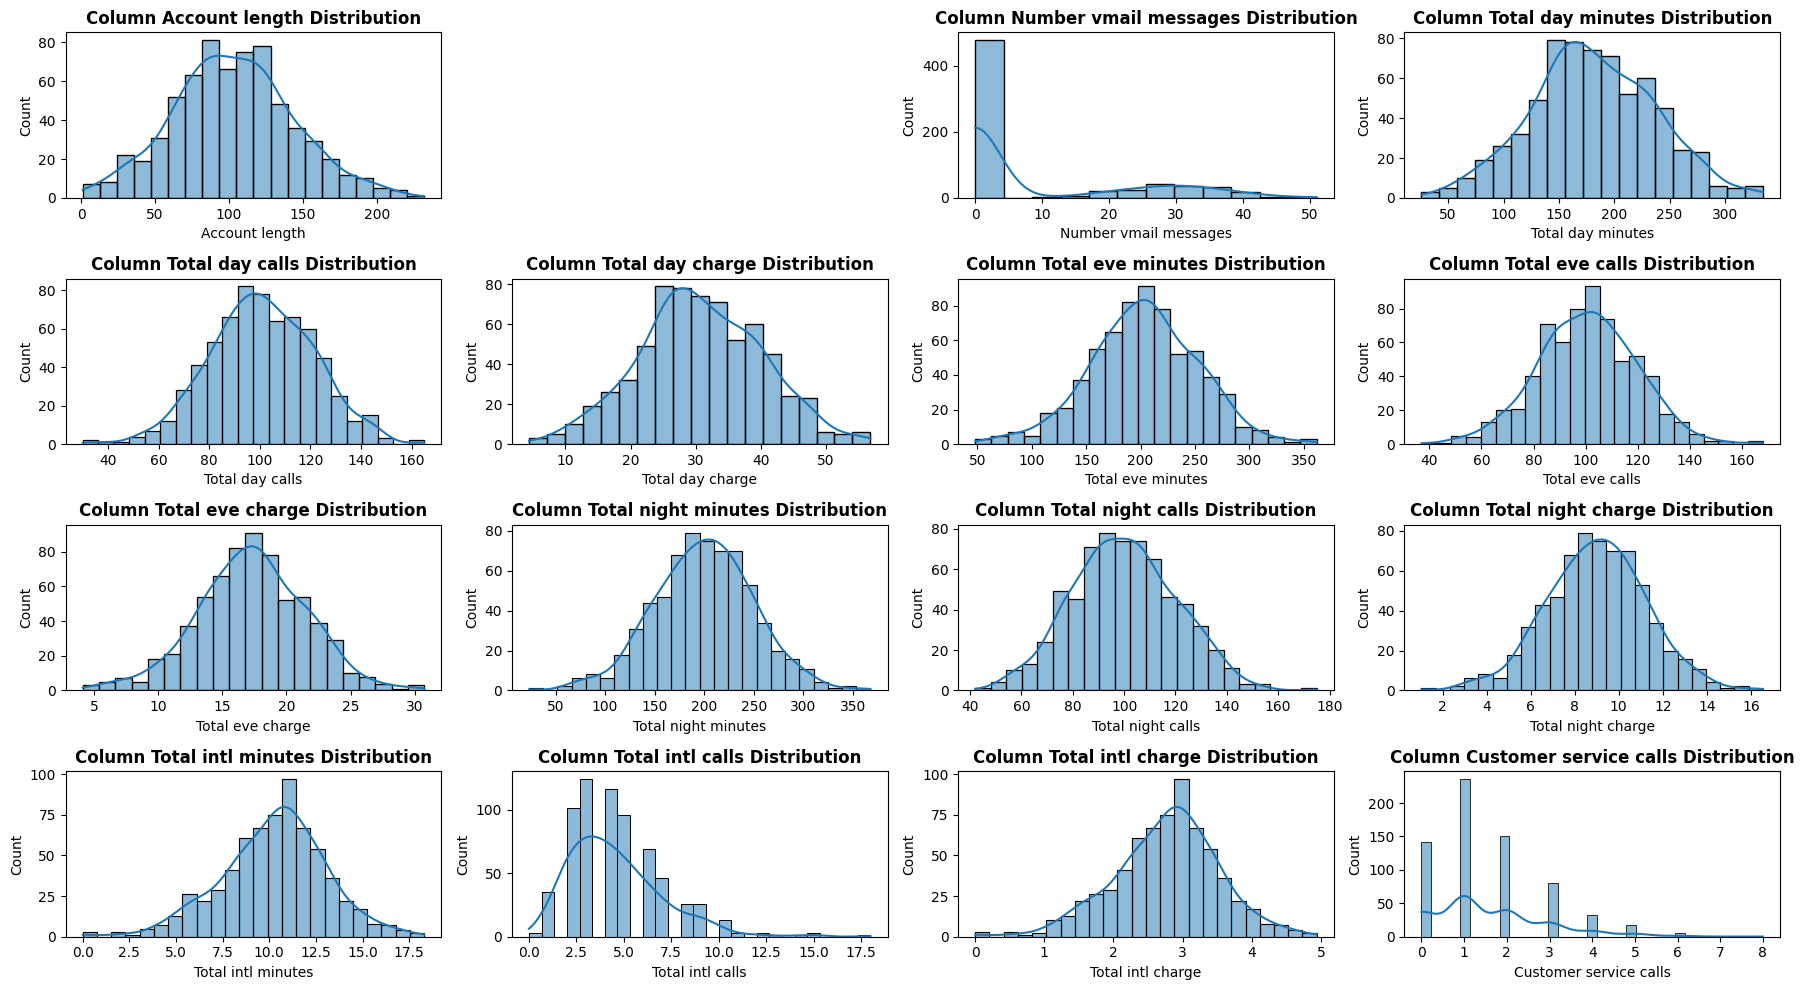

In [239]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 10))
for i, col in enumerate(df_numeric.columns):
  if col == 'Area code':
    continue
  plt.subplot(4, 4, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Column {col} Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

###b. Categorical Data Distribution

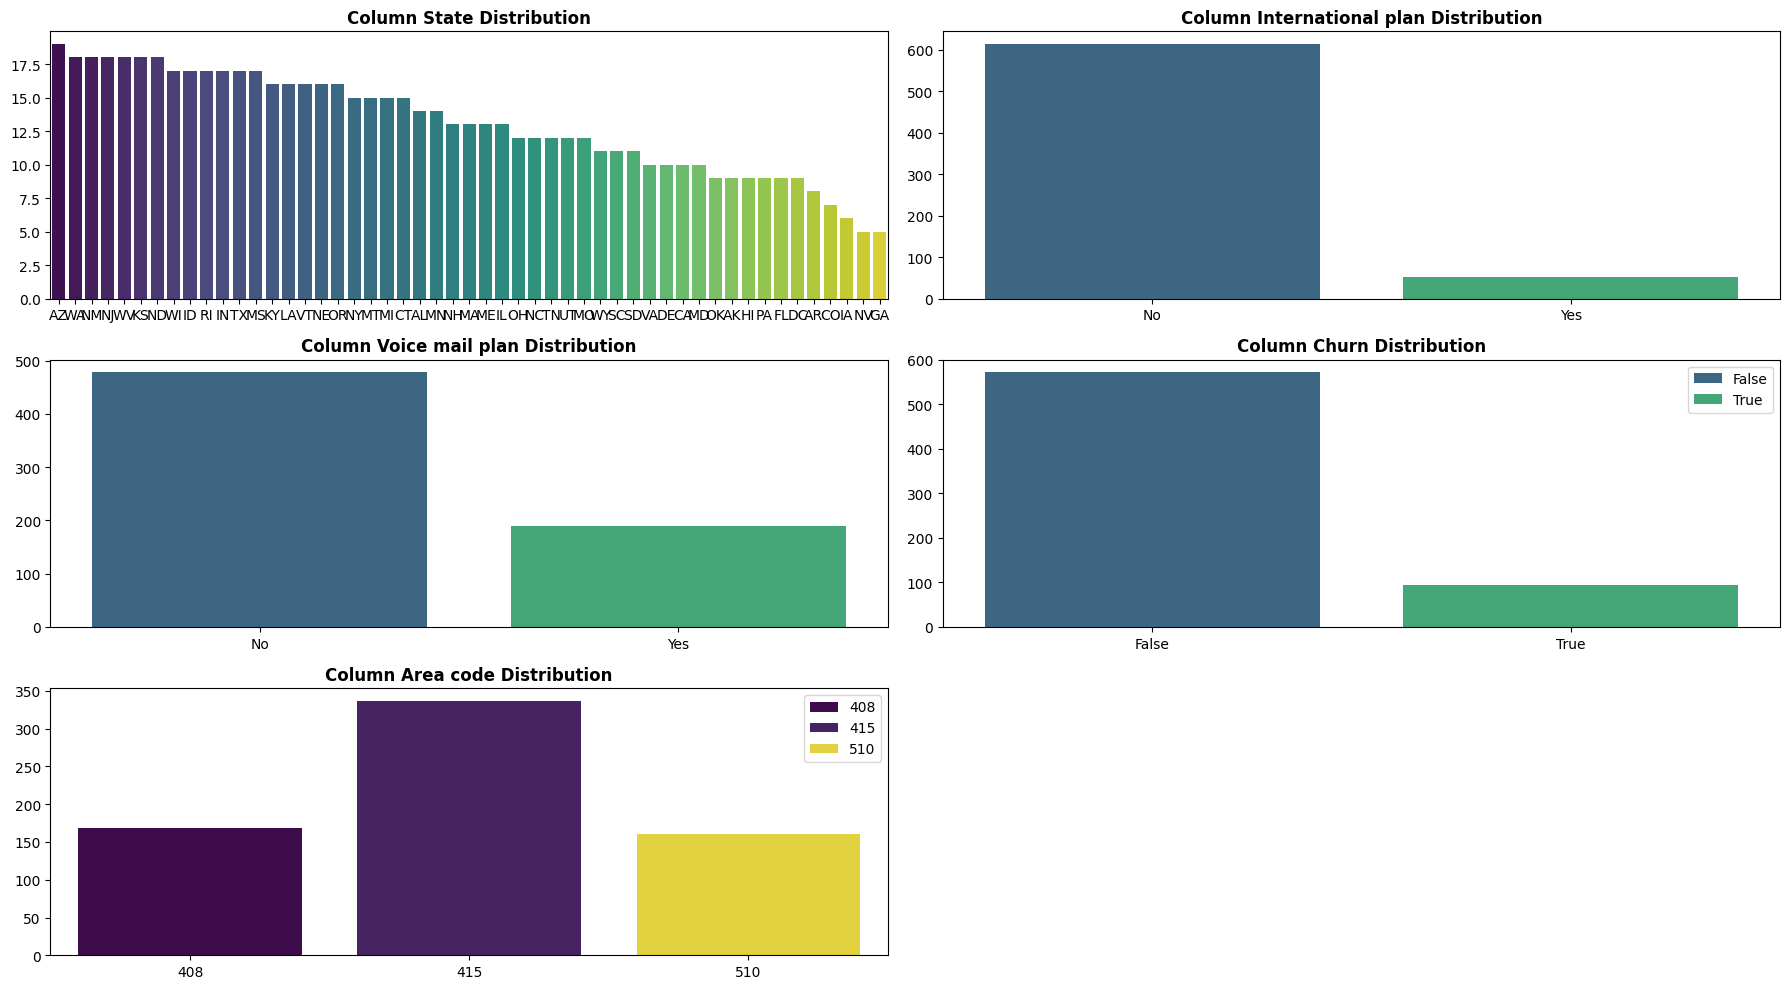

In [240]:
df_object = df.select_dtypes(include=['object', 'bool']).columns.tolist()
df_object.extend(['Area code'])
df_object = df[df_object]

plt.figure(figsize=(18, 10))
for i, col in enumerate(df_object.columns):
  plt.subplot(3, 2, i+1)
  data = df[col].value_counts()
  x = data.index.tolist()
  y = data.values.tolist()
  sns.barplot(x=x, y=y, hue=x, palette='viridis')
  plt.title(f'Column {col} Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

##**4. Data Outlier Detection**
---

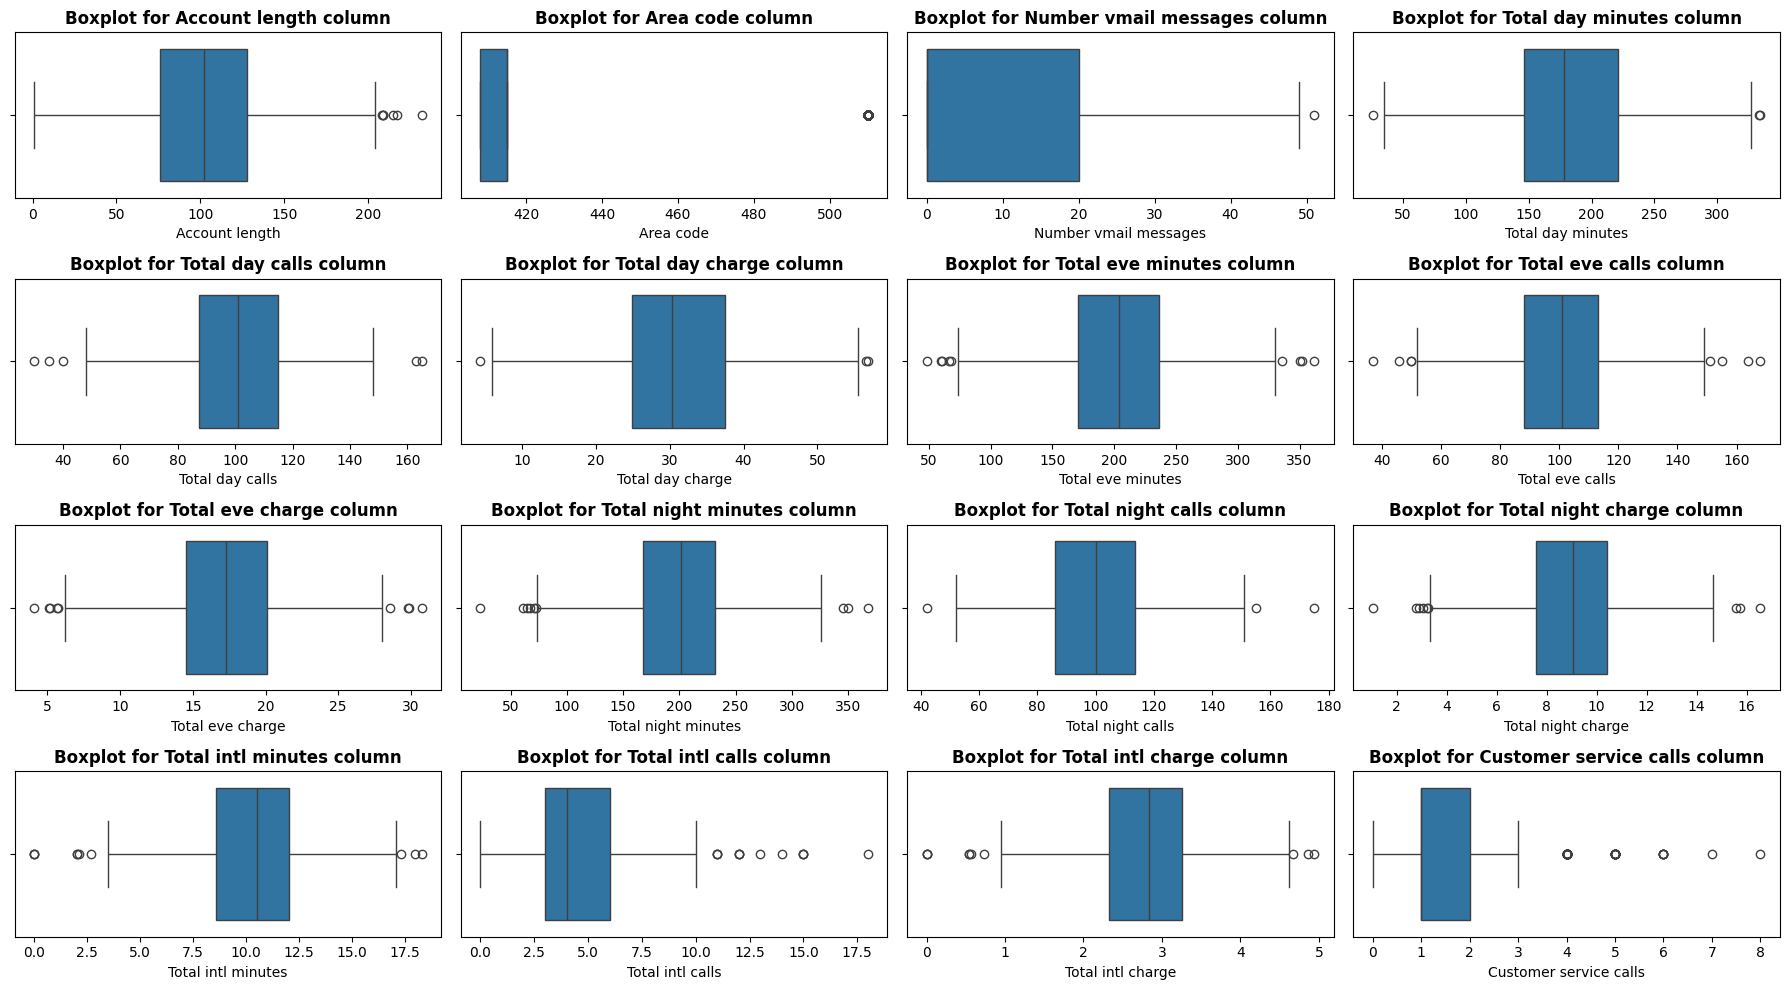

In [241]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 10))
for i, col in enumerate(df_numeric.columns):
  plt.subplot(4, 4, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot for {col} column', fontweight='bold')
plt.tight_layout()
plt.show()

##**5. Data Correlation**
---

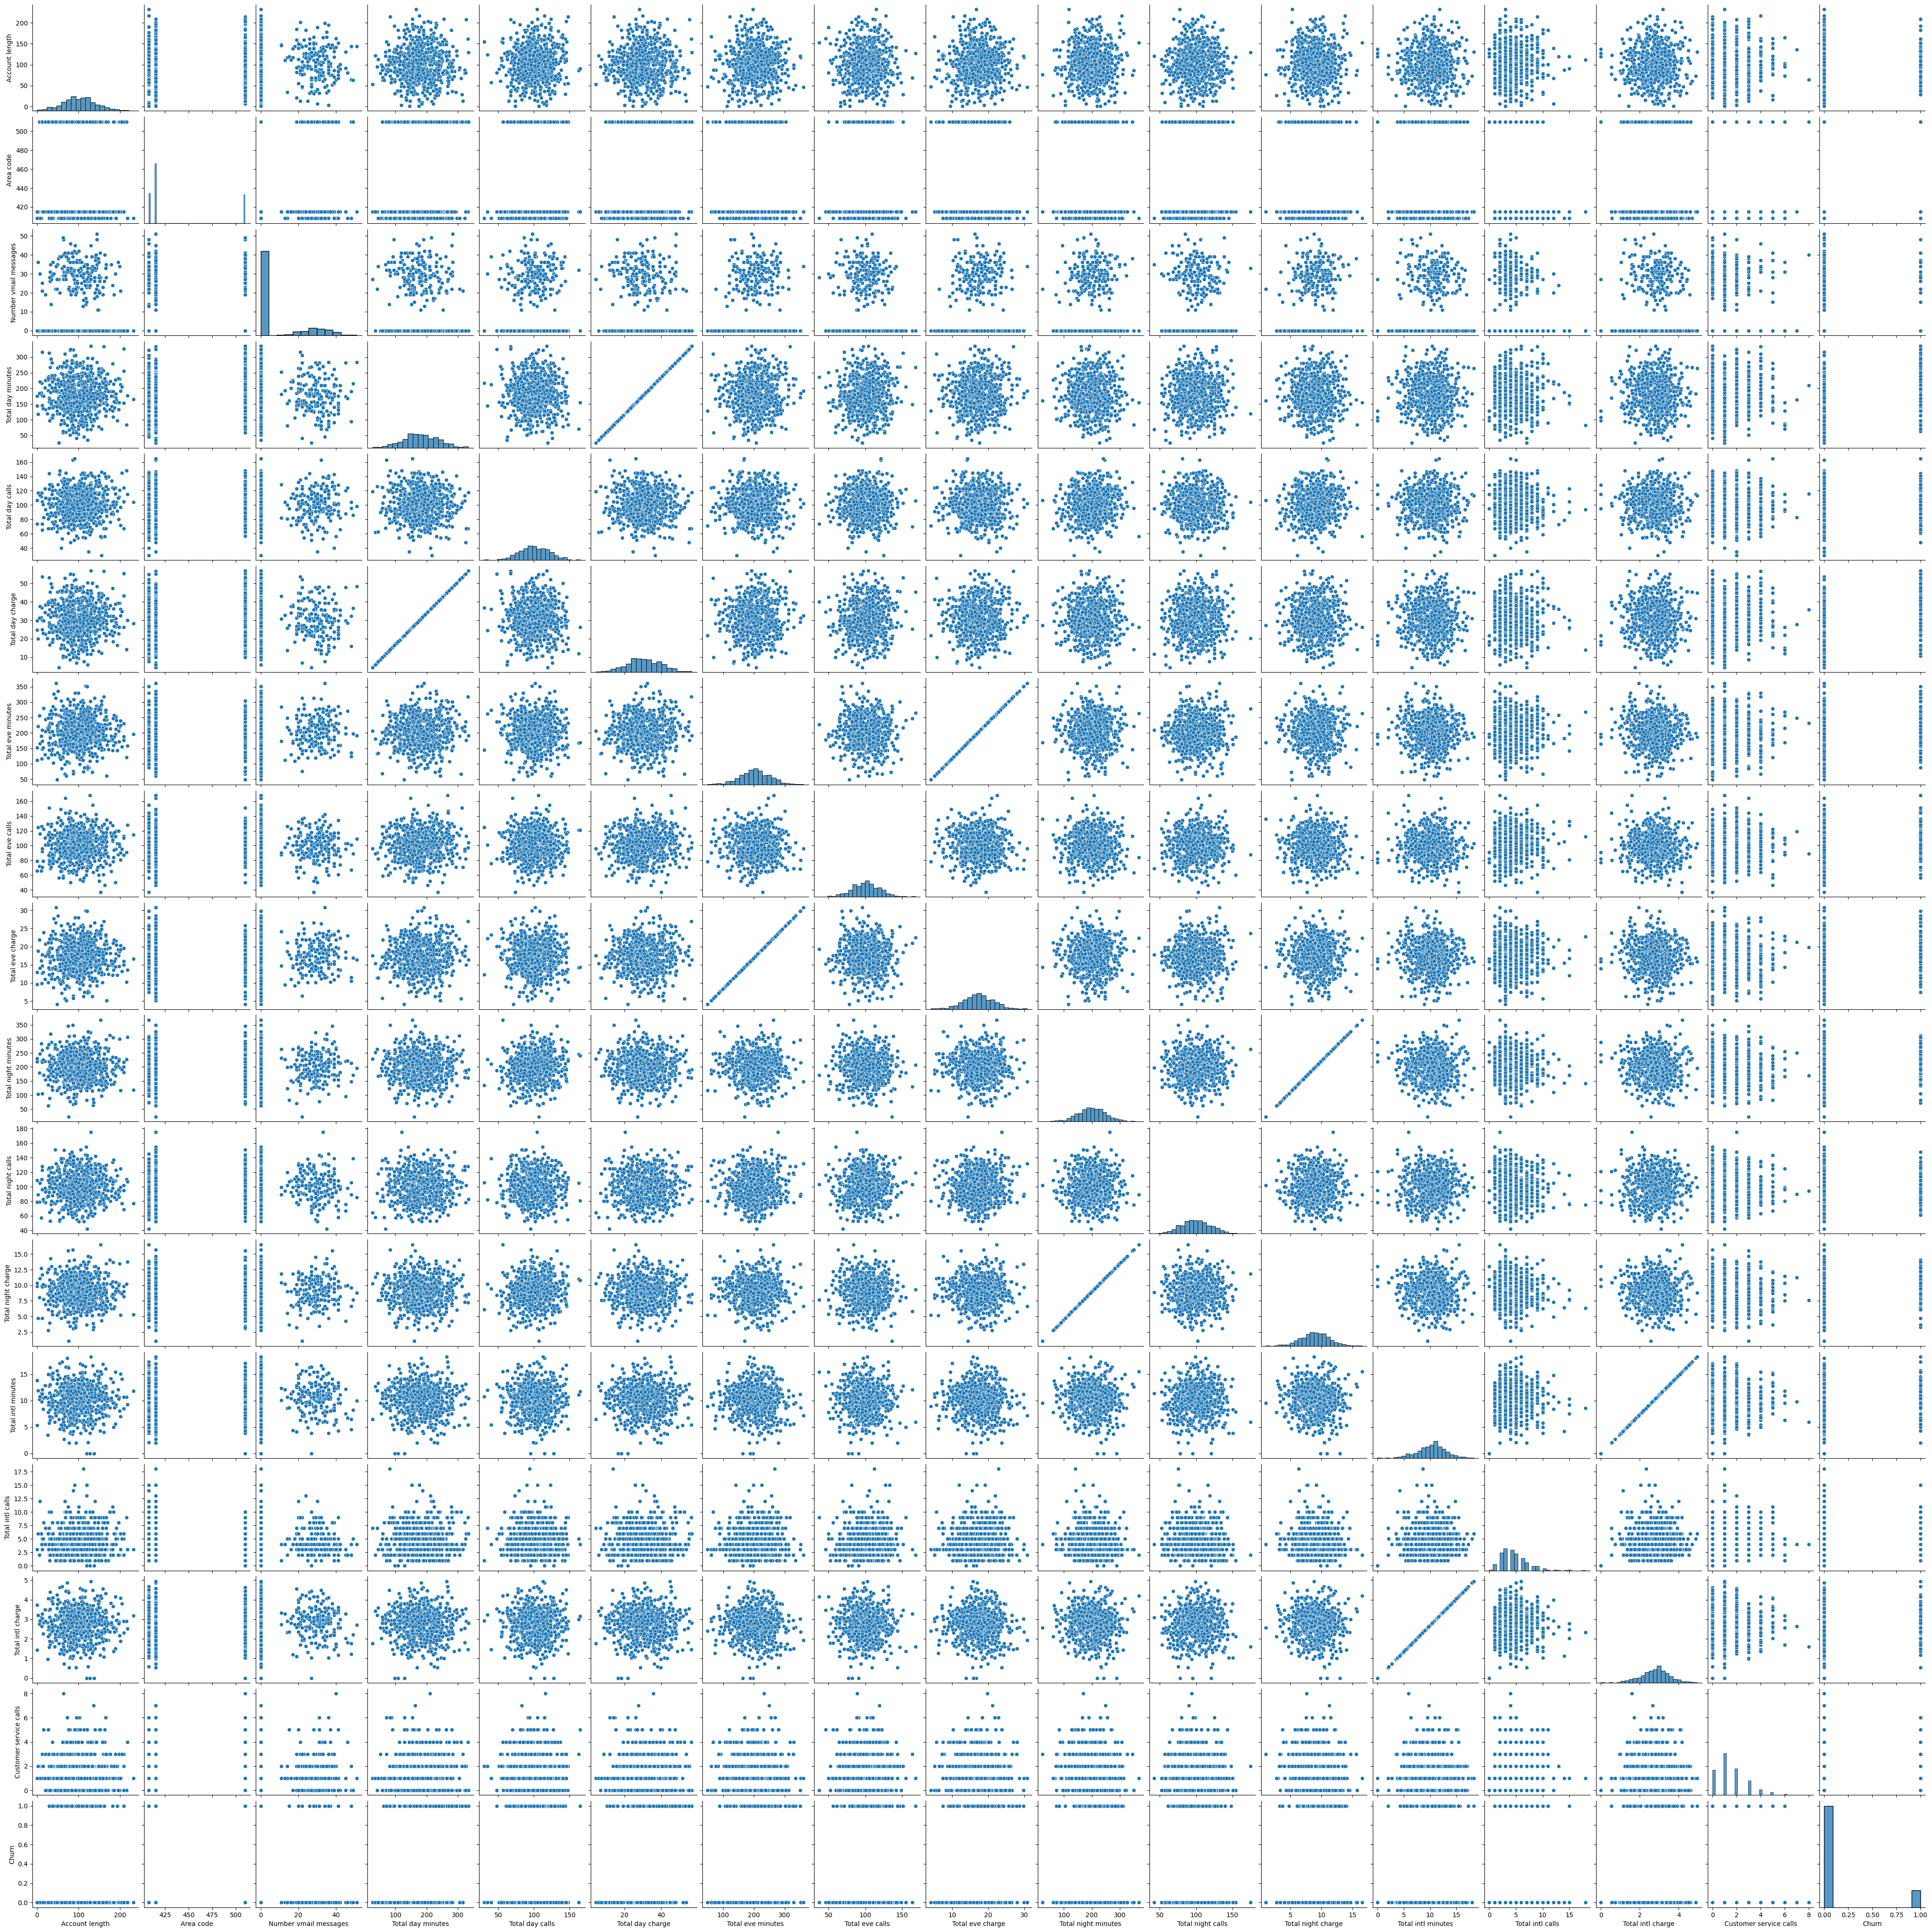

In [242]:
sns.pairplot(df)
plt.show()

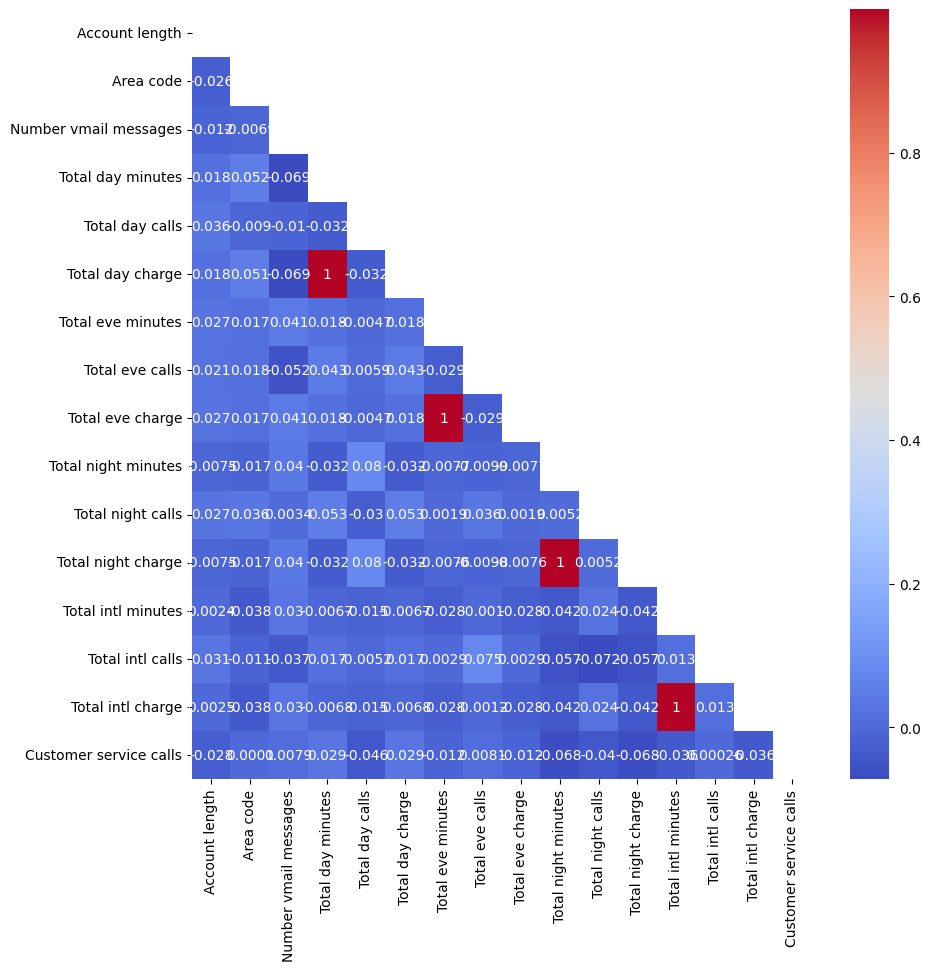

In [243]:
df_numeric = df.select_dtypes(include='number')

correlation = df_numeric.corr()
mask = np.triu(np.ones_like(correlation, dtype=float))

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')
plt.show()

#**Data Cleaning**
---

##**1. Outlier Handling**
---

In [244]:
numeric = df.select_dtypes(include='number')

for col in numeric.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  outliers = np.where((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))[0]
  p = (len(outliers) / len(df)) * 100
  print(f'Percentage of outliers on {col} column: {p}%')

Percentage of outliers on Account length column: 0.8995502248875562%
Percentage of outliers on Area code column: 24.137931034482758%
Percentage of outliers on Number vmail messages column: 0.14992503748125938%
Percentage of outliers on Total day minutes column: 0.4497751124437781%
Percentage of outliers on Total day calls column: 0.7496251874062968%
Percentage of outliers on Total day charge column: 0.4497751124437781%
Percentage of outliers on Total eve minutes column: 1.3493253373313343%
Percentage of outliers on Total eve calls column: 1.199400299850075%
Percentage of outliers on Total eve charge column: 1.3493253373313343%
Percentage of outliers on Total night minutes column: 1.3493253373313343%
Percentage of outliers on Total night calls column: 0.4497751124437781%
Percentage of outliers on Total night charge column: 1.3493253373313343%
Percentage of outliers on Total intl minutes column: 1.4992503748125936%
Percentage of outliers on Total intl calls column: 1.7991004497751124%
Pe

In [245]:
# Based on the resulting outliers above, the number of outliers in each column are fairly insignificant,
# except for the Area Code column, which has more than 24% outlier rate. However, based on the boxplot
# on the previous chapter, there are extreme values

area_code_ext = df[df['Area code'] > 500]
area_code_ext

# whilst these data are outliers, the proportion of outlier data, whilst significant, do not exceed 30%, and,
# combined with the fact that these are very likely valid area codes (as it's repeated many times), it would not
# be deleted

State  Account length  Area code International plan Voice mail plan  \
4      HI              49        510                 No              No   
10     MN              74        510                 No             Yes   
13     VT             128        510                 No             Yes   
19     MI              36        510                 No             Yes   
28     MO               6        510                 No              No   
..    ...             ...        ...                ...             ...   
653    MD             133        510                 No              No   
654    NY             120        510                 No             Yes   
656    AK              99        510                 No              No   
659    CA             127        510                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
4                        0              119.3              117   
10                      33              193.7               91   
13                      29              179.3              104   
19                      29              281.4              102   
28                       0              183.6              117   
..                     ...                ...              ...   
653                      0              295.0              141   
654                     27              128.5              115   
656                      0              238.4               96   
659                      0              107.9              128   
666                      0              213.8              105   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
4               20.28              215.1              109             18.28   
10              32.93              246.1               96             20.92   
13              30.48              225.9               86             19.20   
19              47.84              202.2               76             17.19   
28              31.21              256.7               72             21.82   
..                ...                ...              ...               ...   
653             50.15              223.6              101             19.01   
654             21.85              163.7               91             13.91   
656             40.53              246.5              130             20.95   
659             18.34              187.0               77             15.90   
666             36.35              159.6               84             13.57   

     Total night minutes  Total night calls  Total night charge  \
4                  178.7                 90                8.04   
10                 138.0                 92                6.21   
13                 323.0                 78               14.54   
19                 187.2                113                8.42   
28                 178.6                 79                8.04   
..                   ...                ...                 ...   
653                229.4                109               10.32   
654                242.9                121               10.93   
656                198.4                117                8.93   
659                218.5                 95                9.83   
666                139.2                137                6.26   

     Total intl minutes  Total intl calls  Total intl charge  \
4                  11.1                 1               3.00   
10                 14.6                 3               3.94   
13                  8.6                 7               2.32   
19                  9.0                 6               2.43   
28                 10.2                 2               2.75   
..                  ...               ...                ...   
653                12.9                 4               3.48   
654                 0.0                 0   

#**Data Preparation**
---

##**1. Categorical Feature Encoding**
---

In [246]:
col = ['Voice mail plan', 'International plan', 'Churn']

df = pd.get_dummies(df, columns=col, drop_first=True, dtype=int)
df.head()

State  Account length  Area code  Number vmail messages  Total day minutes  \
0    LA             117        408                      0              184.5   
1    IN              65        415                      0              129.1   
2    NY             161        415                      0              332.9   
3    SC             111        415                      0              110.4   
4    HI              49        510                      0              119.3   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0               97             31.37              351.6               80   
1              137             21.95              228.5               83   
2               67             56.59              317.8               97   
3              103             18.77              137.3              102   
4              117             20.28              215.1              109   

   Total eve charge  Total night minutes  Total night calls  \
0             29.89                215.8                 90   
1             19.42                208.8                111   
2             27.01                160.6                128   
3             11.67                189.6                105   
4             18.28                178.7                 90   

   Total night charge  Total intl minutes  Total intl calls  \
0                9.71                 8.7                 4   
1                9.40                12.7                 6   
2                7.23                 5.4                 9   
3                8.53                 7.7                 6   
4                8.04                11.1                 1   

   Total intl charge  Customer service calls  Voice mail plan_Yes  \
0               2.35                       1                    0   
1               3.43                       4                    0   
2               1.46                       4                    0   
3               2.08                       2                    0   
4               3.00                       1                    0   

   International plan_Yes  Churn_True  
0                       0           0  
1                       0           1  
2                       0           1  
3                       0           0  
4                       0           0

In [247]:
encoder = LabelEncoder()

df['State'] = encoder.fit_transform(df['State'])

In [248]:
df = df.rename(columns={
    'Churn_True': 'Churn'
})

df.head()

State  Account length  Area code  Number vmail messages  Total day minutes  \
0     18             117        408                      0              184.5   
1     15              65        415                      0              129.1   
2     34             161        415                      0              332.9   
3     40             111        415                      0              110.4   
4     11              49        510                      0              119.3   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0               97             31.37              351.6               80   
1              137             21.95              228.5               83   
2               67             56.59              317.8               97   
3              103             18.77              137.3              102   
4              117             20.28              215.1              109   

   Total eve charge  Total night minutes  Total night calls  \
0             29.89                215.8                 90   
1             19.42                208.8                111   
2             27.01                160.6                128   
3             11.67                189.6                105   
4             18.28                178.7                 90   

   Total night charge  Total intl minutes  Total intl calls  \
0                9.71                 8.7                 4   
1                9.40                12.7                 6   
2                7.23                 5.4                 9   
3                8.53                 7.7                 6   
4                8.04                11.1                 1   

   Total intl charge  Customer service calls  Voice mail plan_Yes  \
0               2.35                       1                    0   
1               3.43                       4                    0   
2               1.46                       4                    0   
3               2.08                       2                    0   
4               3.00                       1                    0   

   International plan_Yes  Churn  
0                       0      0  
1                       0      1  
2                       0      1  
3                       0      0  
4                       0      0

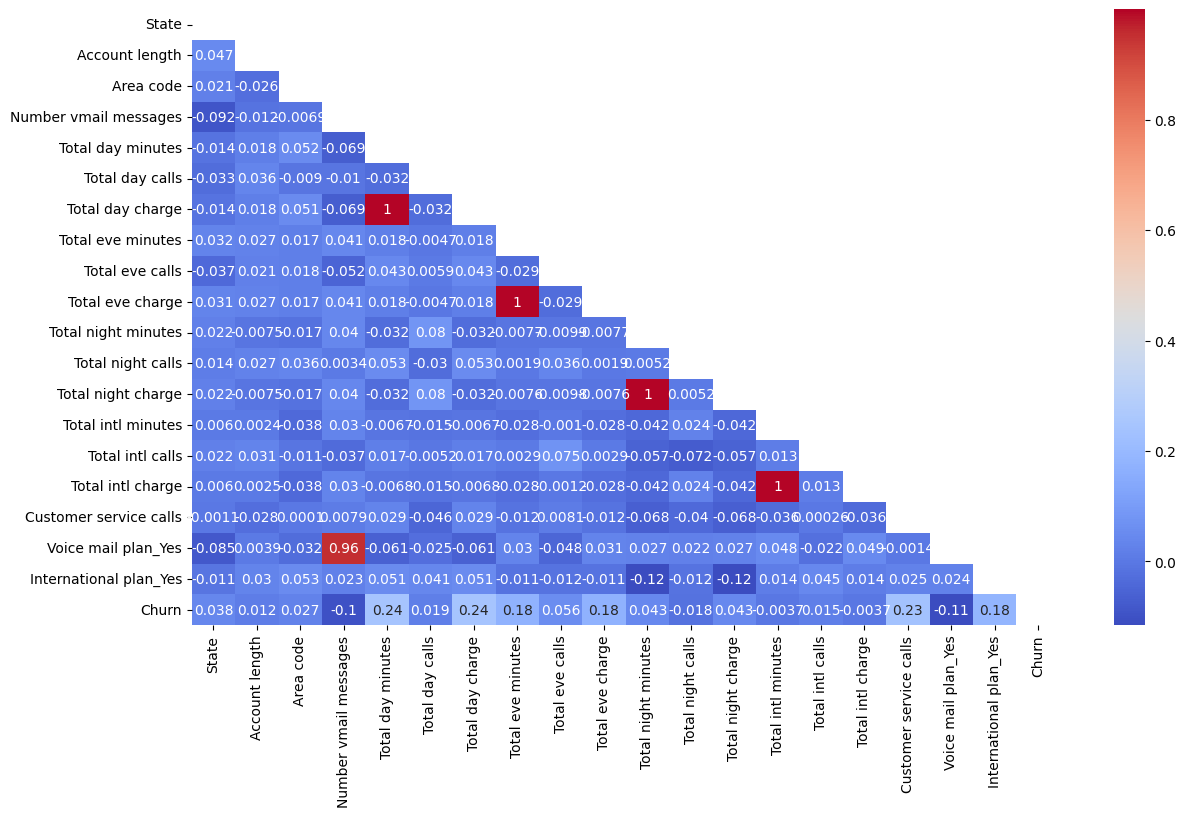

In [249]:
df_num = df.select_dtypes(include='number')

correlation = df_num.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(14, 8))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')
plt.show()

##**2. Feature Selection**
---

In [250]:
x_input = df[[col for col in df.columns if col not in ['Churn', 'State']]]
y = df['Churn']

###a. RFECV

In [251]:
lr = LogisticRegression()

selector = RFECV(
    estimator=lr,
    step=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    min_features_to_select=5,
    verbose=5,
    #max_iter=100000
)
selector.fit(x_input, y)
print(selector.support_)

result = pd.DataFrame({
    'use': selector.support_.tolist()
}, index=x_input.columns.tolist())

display(result)
columns_to_use_rfecv = result[result['use']==True].index.tolist()

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False  True  True  True False False  True False False False  True False
  True  True  True  True  True  True]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


use
Account length          False
Area code                True
Number vmail messages    True
Total day minutes        True
Total day calls         False
Total day charge        False
Total eve minutes        True
Total eve calls         False
Total eve charge        False
Total night minutes     False
Total night calls        True
Total night charge      False
Total intl minutes       True
Total intl calls         True
Total intl charge        True
Customer service calls   True
Voice mail plan_Yes      True
International plan_Yes   True

###b. Mutual Information

In [252]:
selector = mutual_info_classif(x_input, y, random_state=42)

score_df = pd.DataFrame({
    'scores': selector.tolist()
}, index=x_input.columns).sort_values(by='scores', ascending=False)
cols_mi = score_df.head(6).index

score_df

scores
Total day minutes       0.073654
Total day charge        0.069303
Customer service calls  0.029315
Area code               0.026843
Total eve calls         0.019814
Total eve charge        0.019117
Total eve minutes       0.018270
Total intl charge       0.017013
Number vmail messages   0.013202
Total day calls         0.005518
Total night calls       0.001127
Voice mail plan_Yes     0.000670
Total intl minutes      0.000370
Account length          0.000000
Total night minutes     0.000000
Total night charge      0.000000
Total intl calls        0.000000
International plan_Yes  0.000000

###c. Select K-Best

In [253]:
object_cols = ['State', 'Voice mail plan_Yes', 'International plan_Yes', 'Area code']
numeric_cols = [col for col in df_numeric.columns if col not in ['Churn', 'Area code']]

In [254]:
skbest_obj = SelectKBest(score_func=f_classif, k=4)
skbest_obj.fit(df[object_cols], y)

score_df_obj = pd.DataFrame({
    'scores': skbest_obj.scores_
}, index=object_cols).sort_values(by='scores', ascending=False)

cols_skbest = score_df_obj.head(1).index.tolist()

score_df_obj

scores
International plan_Yes  22.687496
Voice mail plan_Yes      8.673095
State                    0.986527
Area code                0.489805

In [255]:
skbest_num = SelectKBest(score_func=f_classif, k=4)
skbest_num.fit(df[numeric_cols], y)

score_df = pd.DataFrame({
    'scores': skbest_num.scores_
}, index=numeric_cols).sort_values(by='scores', ascending=False)
cols_skbest.extend(score_df.head(5).index.tolist())

score_df

scores
Total day minutes       41.651876
Total day charge        41.650275
Customer service calls  38.264489
Total eve charge        21.161995
Total eve minutes       21.161392
Number vmail messages    7.044245
Total eve calls          2.067284
Total night charge       1.229475
Total night minutes      1.227859
Total day calls          0.249344
Total night calls        0.206675
Total intl calls         0.156337
Account length           0.100874
Total intl minutes       0.009302
Total intl charge        0.009009

In [256]:
cols_skbest

['International plan_Yes',
 'Total day minutes',
 'Total day charge',
 'Customer service calls',
 'Total eve charge',
 'Total eve minutes']

##**3. Data Splitting and Sampling**
---

In [257]:
x = x_input[columns_to_use_rfecv]#selector.transform(x_input)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
rus = RandomUnderSampler(random_state=42)
x_train, y_train = rus.fit_resample(x_train, y_train)

##**4. Data Scaling**
---

In [258]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#**Data Modelling**
---

##**1. PCA**
---
Finding the optimal number of components

In [259]:
scaler = StandardScaler()
x_input_pca = scaler.fit_transform(x_input)

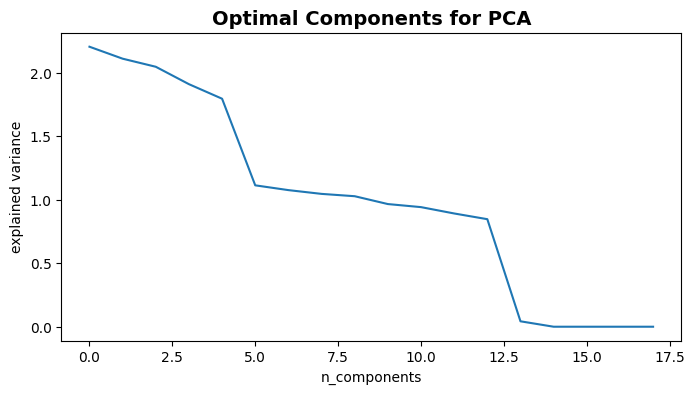

In [260]:
pca = PCA().fit(x_input_pca)
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_)
plt.title('Optimal Components for PCA', fontsize=14, fontweight='bold')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()

In [261]:
pca = PCA(n_components=8)

# Scale x_input before PCA
scaler_pca = StandardScaler()
x_scaled_for_pca = scaler_pca.fit_transform(x_input)
x_pca_transformed = pca.fit_transform(x_scaled_for_pca)

y_pca_original = df['Churn']

rus_pca = RandomUnderSampler(random_state=42)
x_res_pca, y_res_pca = rus_pca.fit_resample(x_pca_transformed, y_pca_original) # Undersampling applied to PCA data

# Split the PCA-transformed and undersampled data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_res_pca, y_res_pca, test_size=0.2, random_state=42)

print(f'Ratio of explained variance:\n{pca.explained_variance_ratio_}')

Ratio of explained variance:
[0.12235819 0.11713163 0.11360063 0.10599489 0.09963644 0.06178638
 0.05969617 0.05804868]


##**2. Classification Model**
---

###a. SVM Classification

In [262]:
# Result with PCA

svc = SVC(kernel='rbf')
svc.fit(x_train_pca, y_train_pca)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(svc, x_train_pca, y_train_pca, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = svc.predict(x_test_pca)
report = classification_report(y_test_pca, y_pred)
cm = confusion_matrix(y_test_pca, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Cross Validation Scores: [0.80645161 0.64516129 0.7        0.86666667 0.56666667]
Mean of Cross Validation Scores: 0.716989247311828

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        18
           1       0.82      0.45      0.58        20

    accuracy                           0.66        38
   macro avg       0.71      0.67      0.65        38
weighted avg       0.71      0.66      0.64        38


Confusion Matrix:
[[16  2]
 [11  9]]



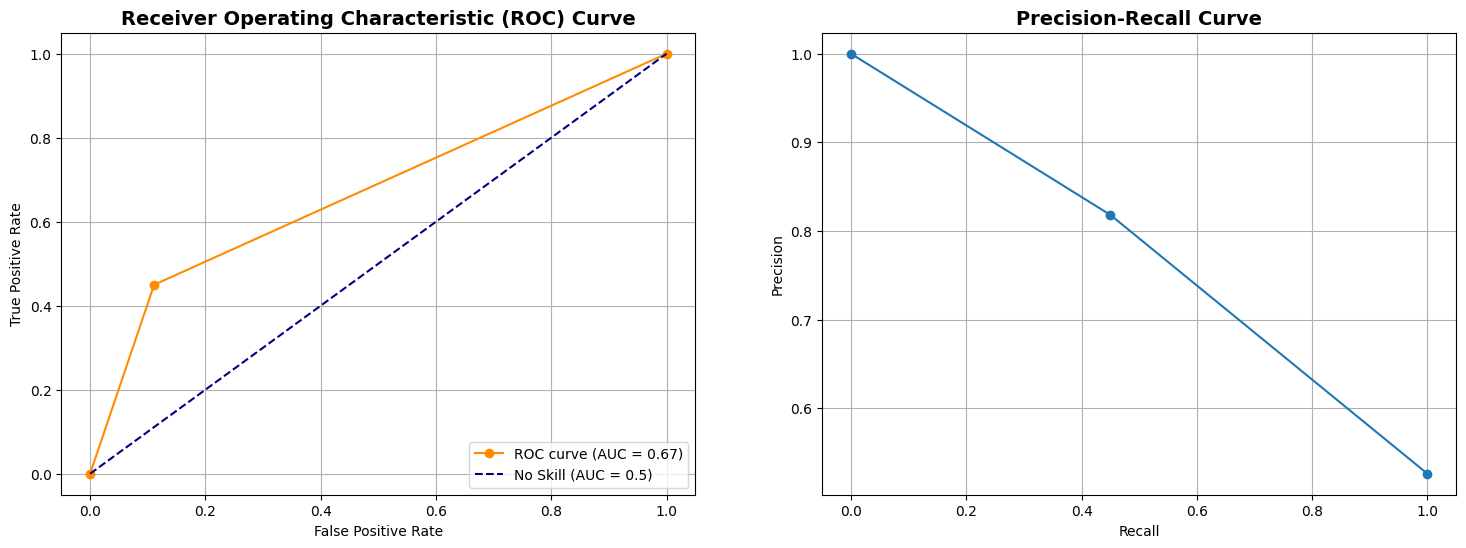

In [263]:
fpr, tpr, threshold = roc_curve(y_test_pca, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test_pca, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [264]:
# Without PCA

svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(svc, x_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Cross Validation Scores: [0.70967742 0.61290323 0.7        0.73333333 0.63333333]
Mean of Cross Validation Scores: 0.6778494623655914

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       115
           1       0.38      0.63      0.47        19

    accuracy                           0.80       134
   macro avg       0.65      0.73      0.67       134
weighted avg       0.85      0.80      0.82       134


Confusion Matrix:
[[95 20]
 [ 7 12]]



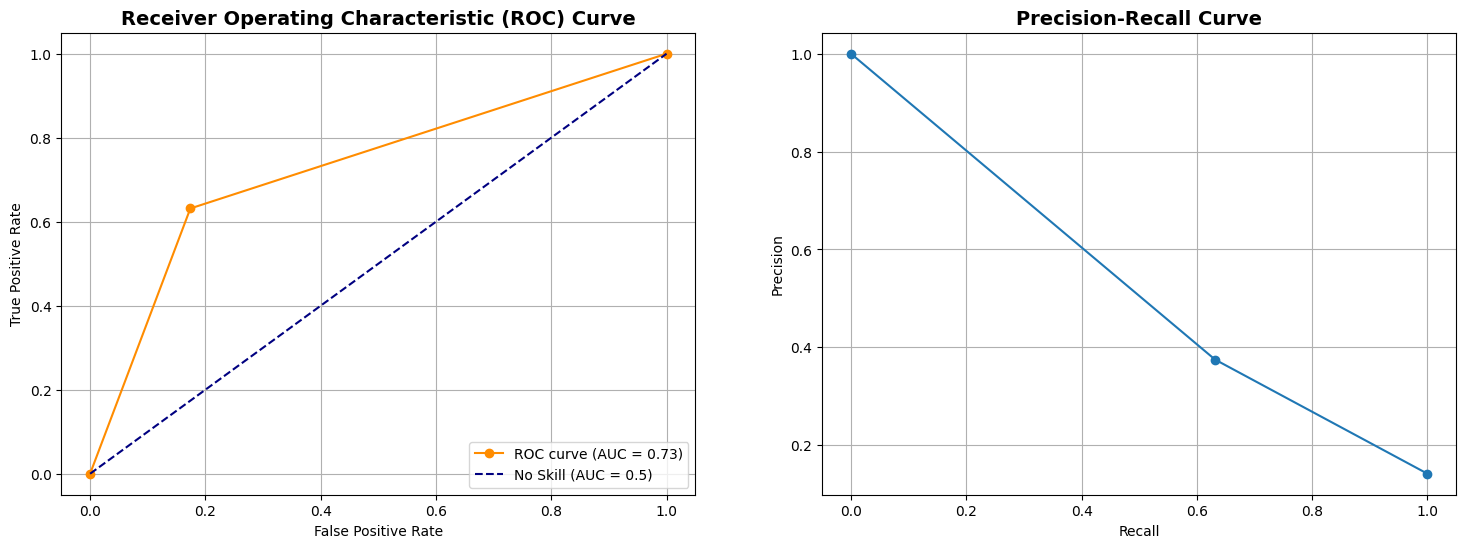

In [265]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

###b. Logistic Regression

In [266]:
# Result with PCA

logreg = LogisticRegression()
logreg.fit(x_train_pca, y_train_pca)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(logreg, x_train_pca, y_train_pca, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = logreg.predict(x_test_pca)
report = classification_report(y_test_pca, y_pred)
cm = confusion_matrix(y_test_pca, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Cross Validation Scores: [0.70967742 0.64516129 0.56666667 0.73333333 0.46666667]
Mean of Cross Validation Scores: 0.6243010752688172

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.79      0.55      0.65        20

    accuracy                           0.68        38
   macro avg       0.71      0.69      0.68        38
weighted avg       0.71      0.68      0.68        38


Confusion Matrix:
[[15  3]
 [ 9 11]]



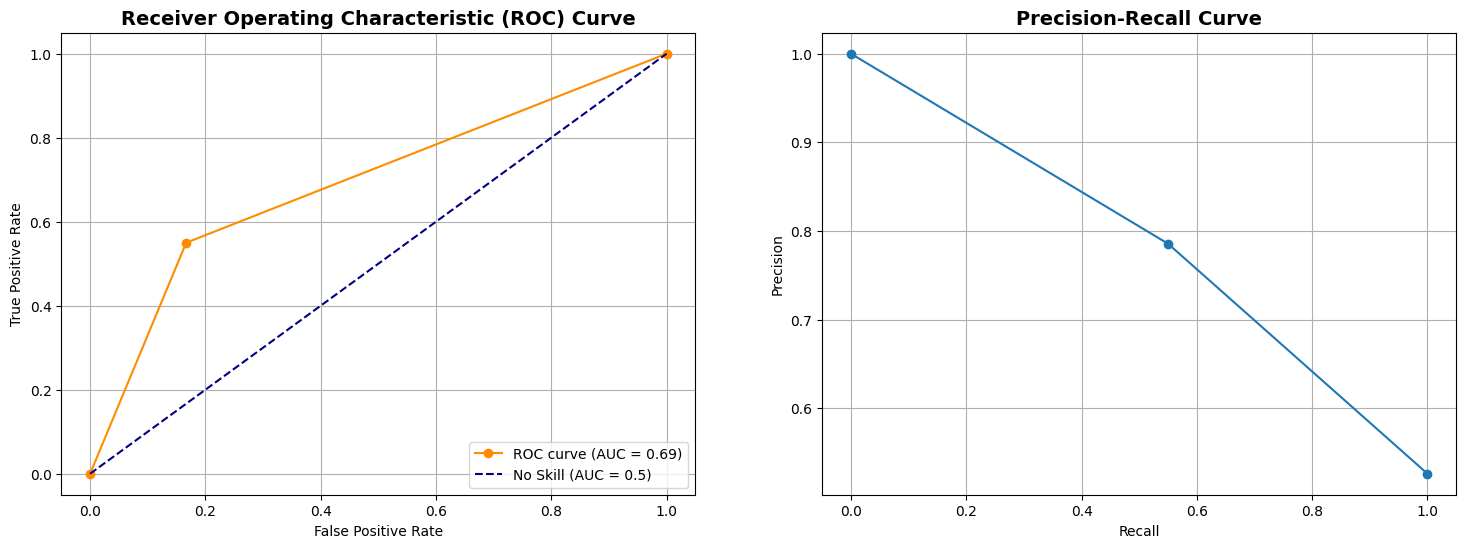

In [267]:
fpr, tpr, threshold = roc_curve(y_test_pca, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test_pca, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [268]:
# Result without PCA

logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(logreg, x_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = logreg.predict(x_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Cross Validation Scores: [0.77419355 0.74193548 0.76666667 0.8        0.8       ]
Mean of Cross Validation Scores: 0.7765591397849463

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       115
           1       0.37      0.68      0.48        19

    accuracy                           0.79       134
   macro avg       0.66      0.75      0.68       134
weighted avg       0.86      0.79      0.81       134


Confusion Matrix:
[[93 22]
 [ 6 13]]



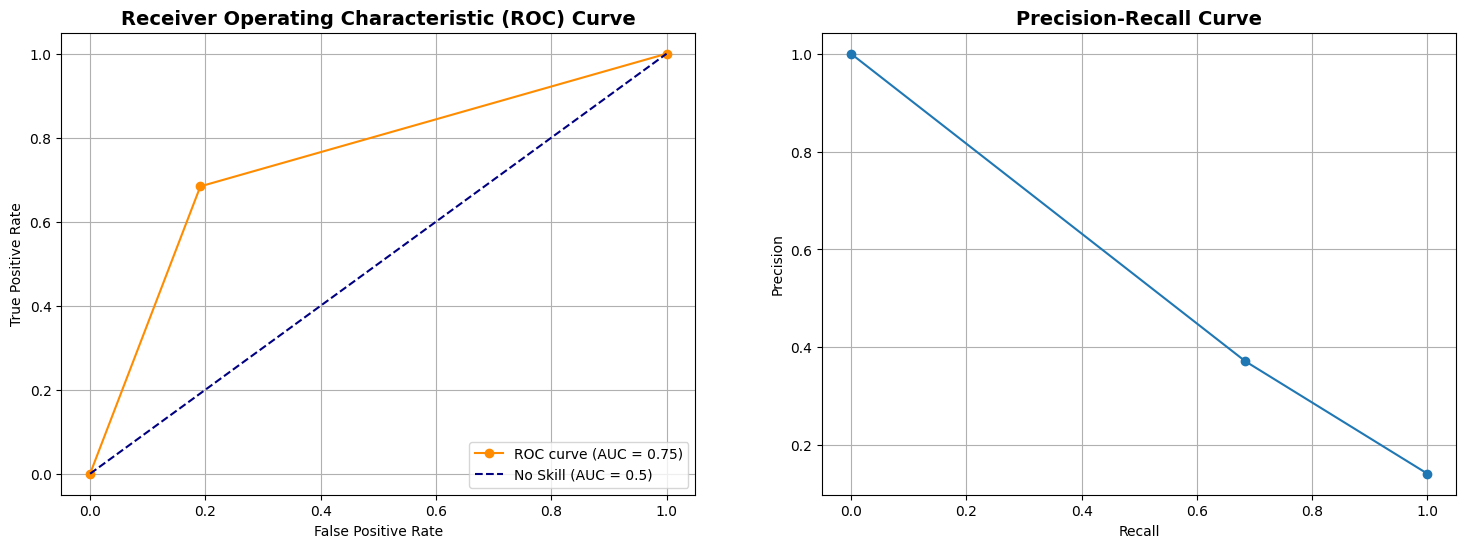

In [269]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

###c. XGBoost

In [270]:
# Result with PCA

xgb = XGBClassifier()
xgb.fit(x_train_pca, y_train_pca)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(xgb, x_train_pca, y_train_pca, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = xgb.predict(x_test_pca)
report = classification_report(y_test_pca, y_pred)
cm = confusion_matrix(y_test_pca, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Cross Validation Scores: [0.70967742 0.41935484 0.53333333 0.76666667 0.56666667]
Mean of Cross Validation Scores: 0.5991397849462367

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70        18
           1       0.77      0.50      0.61        20

    accuracy                           0.66        38
   macro avg       0.68      0.67      0.65        38
weighted avg       0.69      0.66      0.65        38


Confusion Matrix:
[[15  3]
 [10 10]]



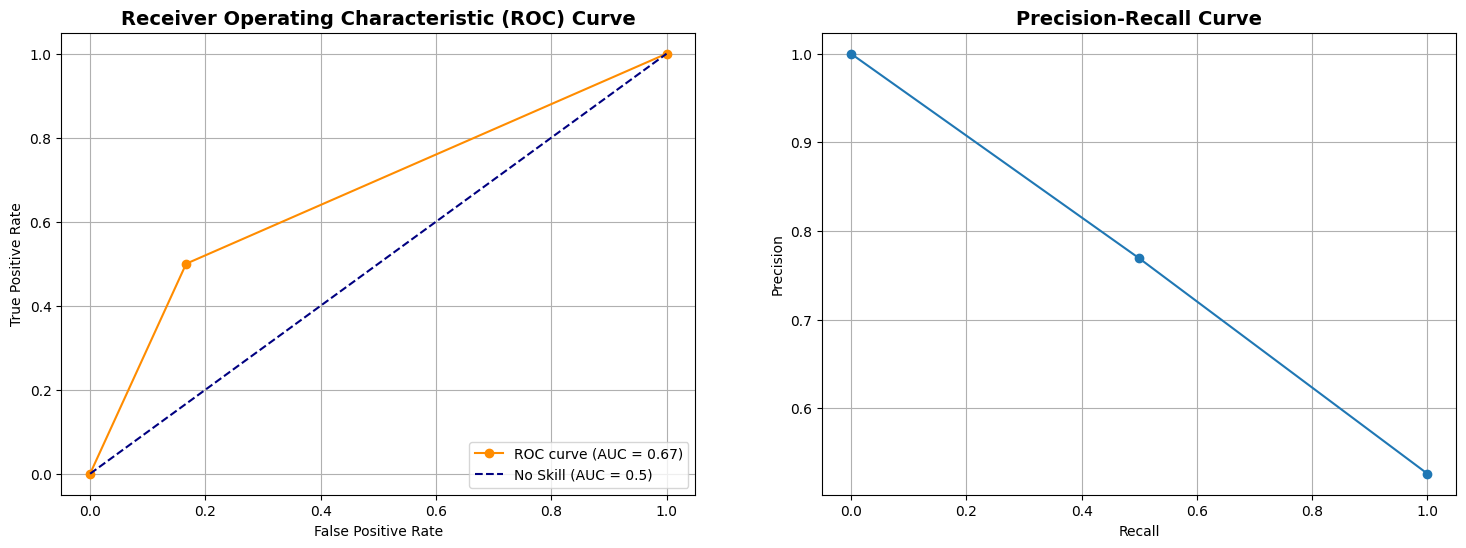

In [271]:
fpr, tpr, threshold = roc_curve(y_test_pca, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test_pca, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [272]:
# Result without PCA

xgb = XGBClassifier(max_iter=10000)
xgb.fit(x_train, y_train)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(xgb, x_train, y_train, cv=kfold, scoring='accuracy')

print(f'Cross Validation Scores: {cross_val}')
print(f'Mean of Cross Validation Scores: {cross_val.mean()}\n')

y_pred = xgb.predict(x_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:47] WARNING: /workspace/src/learner.cc:790: 
Parame

Cross Validation Scores: [0.80645161 0.74193548 0.83333333 0.9        0.76666667]
Mean of Cross Validation Scores: 0.8096774193548388

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       115
           1       0.43      0.84      0.57        19

    accuracy                           0.82       134
   macro avg       0.70      0.83      0.73       134
weighted avg       0.89      0.82      0.84       134


Confusion Matrix:
[[94 21]
 [ 3 16]]



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:26:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


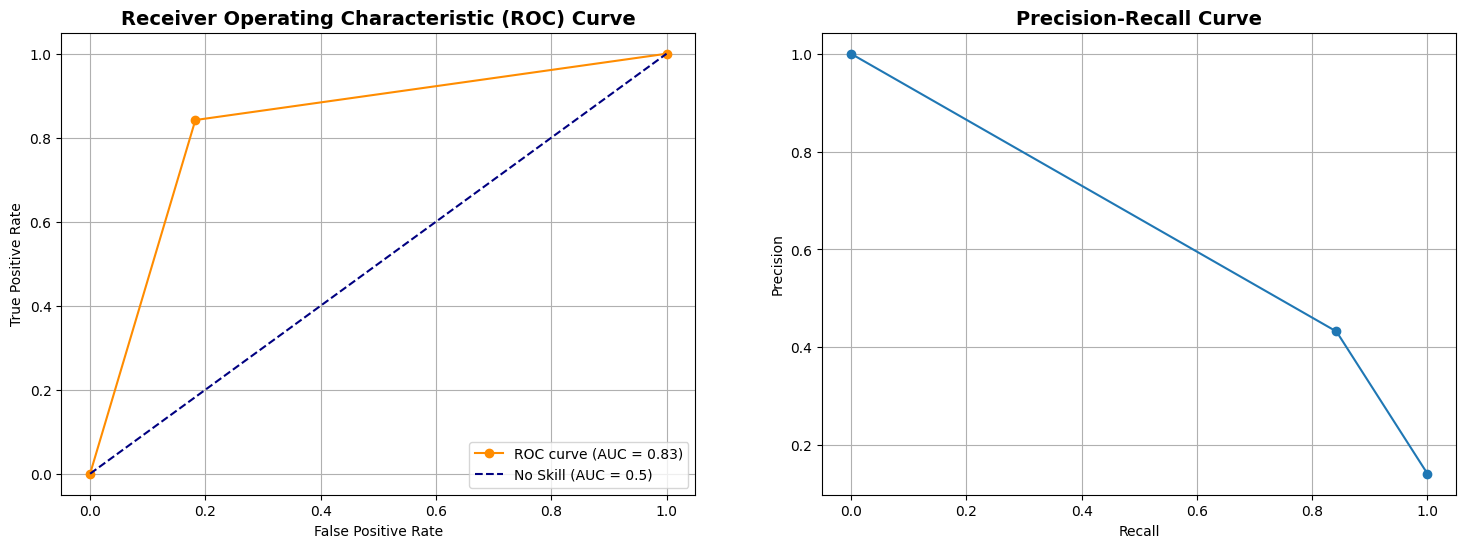

In [273]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, threshold = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', marker='o', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

##**3. Clustering Model**
---

###a. Feature Selection

In [274]:
df_cl = df[[col for col in df.columns if col not in ['Churn', 'State', 'Account length']]]
clusters = range(2, 10)

####Variance Threshold

In [275]:
scaler = MinMaxScaler()
df_cl_minmax = scaler.fit_transform(df_cl)

vt = VarianceThreshold(threshold=0.01)
x_variance = vt.fit_transform(df_cl_minmax)

result_vt = pd.DataFrame({
    'result': vt.get_support().tolist()
}, index=df_cl.columns)
result_vt

result
Area code                 True
Number vmail messages     True
Total day minutes         True
Total day calls           True
Total day charge          True
Total eve minutes         True
Total eve calls           True
Total eve charge          True
Total night minutes       True
Total night calls         True
Total night charge        True
Total intl minutes        True
Total intl calls          True
Total intl charge         True
Customer service calls    True
Voice mail plan_Yes       True
International plan_Yes    True

####MCFS

In [276]:
mcfs = MCFS.mcfs(df_cl.values, n_selected_features=5, k=3)

result_mcfs = pd.DataFrame({
    'result_score': mcfs.tolist()
}, index=df_cl.columns).sort_values(by='result_score', ascending=False)
display(result_mcfs)

cols_mcfs = result_mcfs.head(5).index.tolist()

result_score
Area code                         16
Total eve charge                  15
Total day minutes                 14
Total day charge                  13
Voice mail plan_Yes               12
Total day calls                   11
Total eve calls                   10
International plan_Yes             9
Number vmail messages              8
Total eve minutes                  7
Total night charge                 6
Total night calls                  5
Total intl calls                   4
Total intl minutes                 3
Total intl charge                  2
Customer service calls             1
Total night minutes                0

###b. KMeans Clustering

####Clustering Process

In [303]:
df_cl_n = df_cl[cols_mcfs]

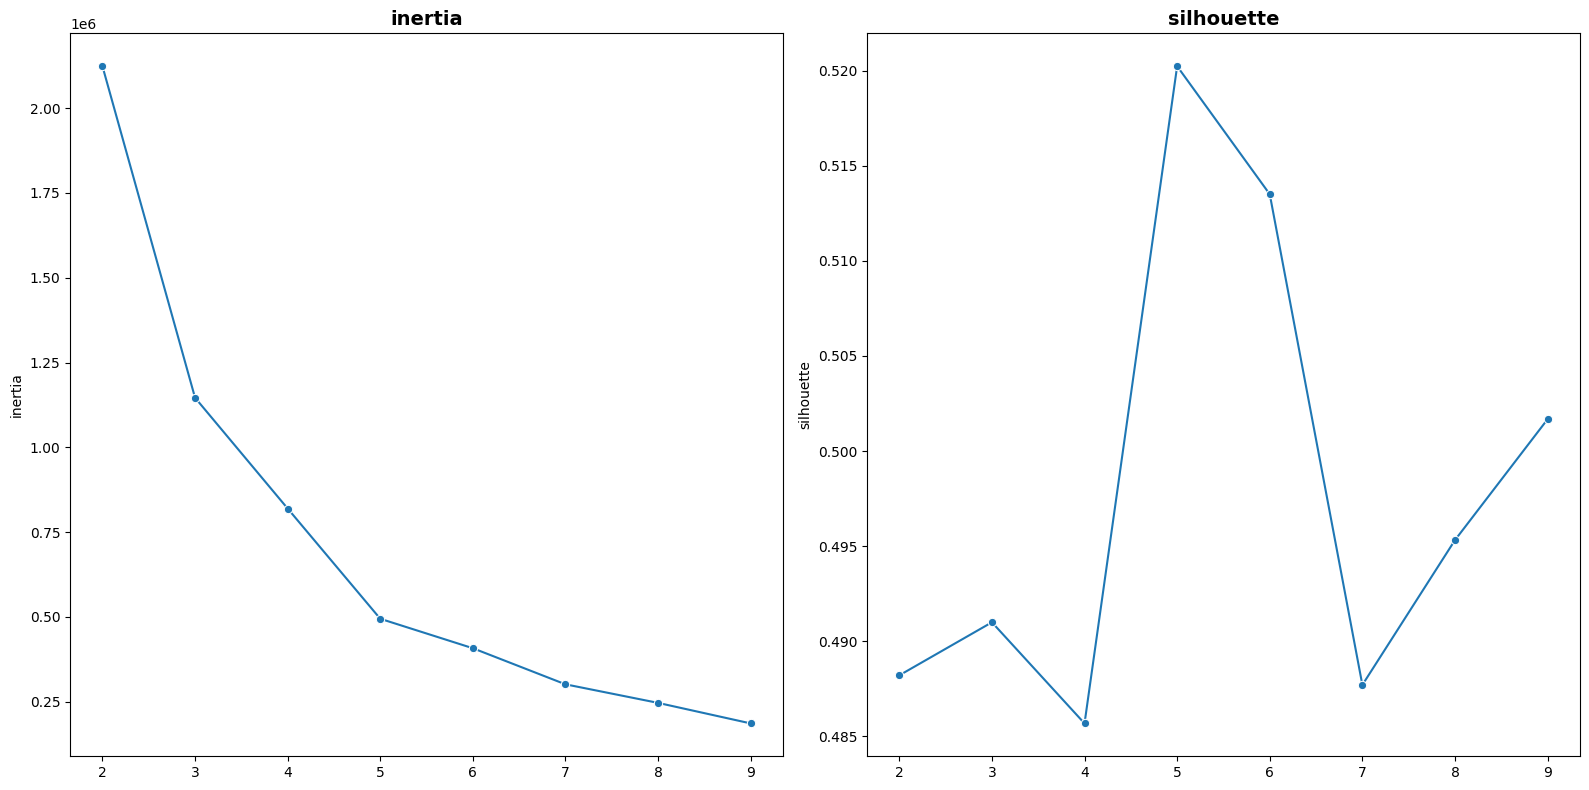

In [304]:
inertia, sil_score = [], []

for i in range(2, 10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_cl_n)
  label = kmeans.labels_
  sil_score.append(silhouette_score(df_cl_n, label, metric='euclidean'))
  inertia.append(kmeans.inertia_)

data = pd.DataFrame({
    'inertia': inertia,
    'silhouette': sil_score,
})
plt.figure(figsize=(16, 8))
for i, col in enumerate(data.columns):
  plt.subplot(1, 2, i+1)
  sns.lineplot(x=range(2, 10), y=data[col], marker='o')
  plt.title(col, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [305]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_cl_n)
label = model.labels_

print(f"Silhouette score: {silhouette_score(df_cl_n, label, metric='euclidean')}")
df_cl_n['cluster'] = model.fit_predict(df_cl_n)
df['cluster'] = model.fit_predict(df_cl_n)
display(df_cl_n['cluster'].value_counts())

Silhouette score: 0.5202272213636587


/tmp/ipython-input-2295191045.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl_n['cluster'] = model.fit_predict(df_cl_n)


cluster
3    244
0    161
2    101
1     96
4     65
Name: count, dtype: int64

####Numerical Data Distribution in Clusters

In [306]:
df_cl_agg = df_cl_n.groupby(by='cluster').agg({
    'Total day minutes': 'mean',
    'Total eve charge': 'mean',
    'Total day charge': 'mean'
})

df_cl_agg

Total day minutes  Total eve charge  Total day charge
cluster                                                       
0               241.051553         17.474099         40.979130
1               146.096875         17.851875         24.836771
2               103.803960         17.132772         17.647030
3               170.070492         17.142254         28.912992
4               244.252308         16.754462         41.523231

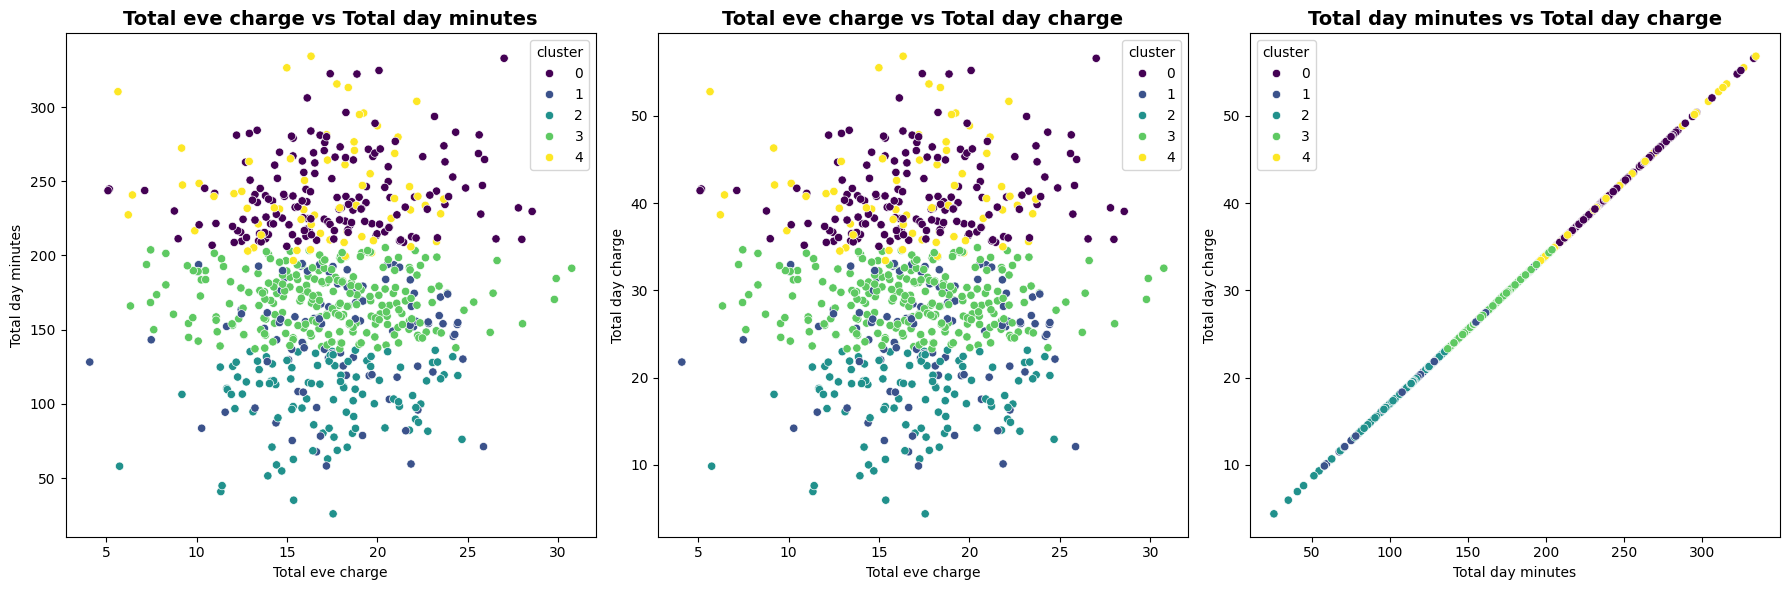

In [307]:
cols_used = ['Area code', 'Voice mail plan_Yes', 'cluster']
columns = [col for col in df_cl_n.columns if col not in cols_used]
iter=0

plt.figure(figsize=(18, 6))
for col in columns:
  cols = [column for column in df_cl_n.columns if column not in cols_used and column != col]
  for column in cols:
    plt.subplot(1, 3, iter+1)
    sns.scatterplot(x=df_cl_n[col], y=df_cl_n[column], hue=df_cl_n['cluster'], palette='viridis')
    plt.title(f'{col} vs {column}', fontsize=14, fontweight='bold')
    iter+=1
  cols_used.append(col)
plt.tight_layout()
plt.show()

####Categorical Data Distribution in Clusters

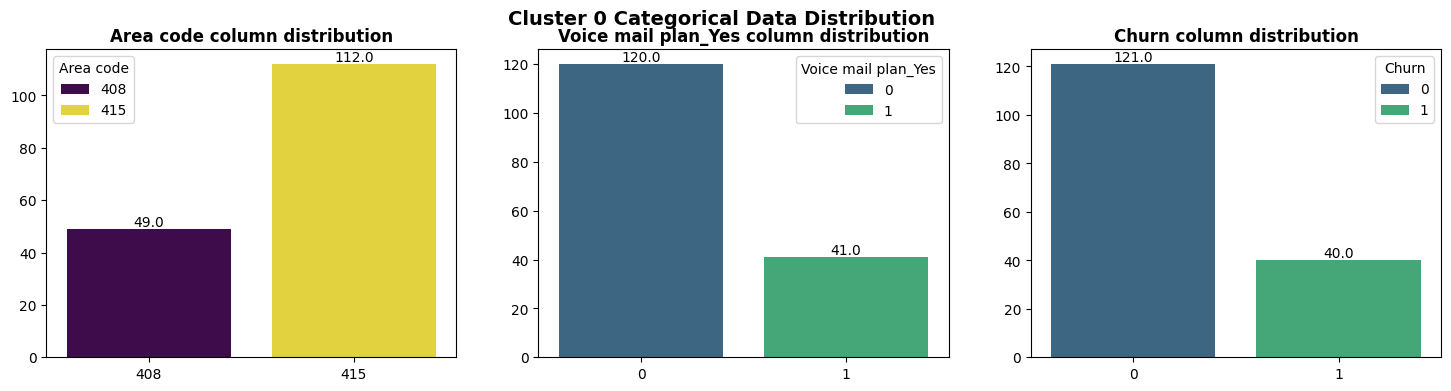

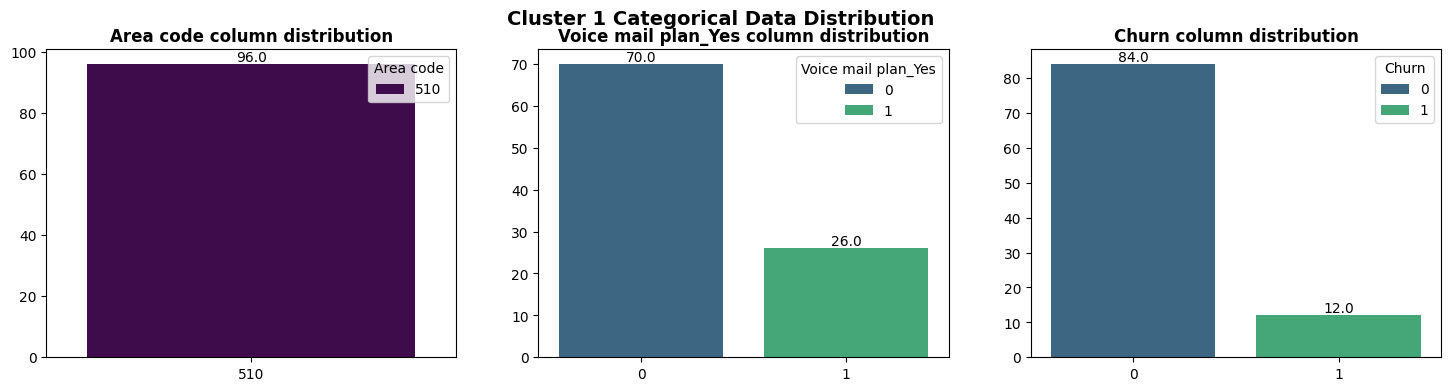

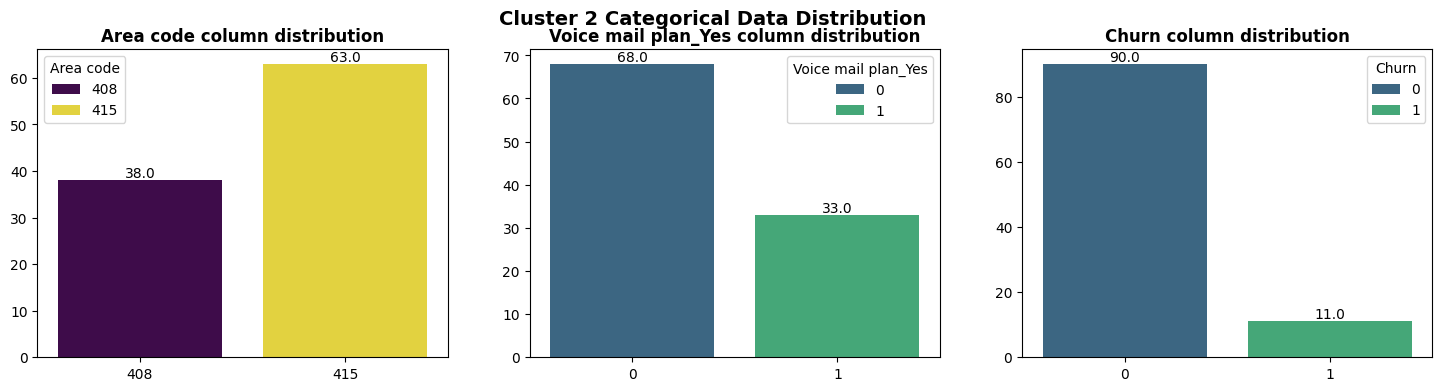

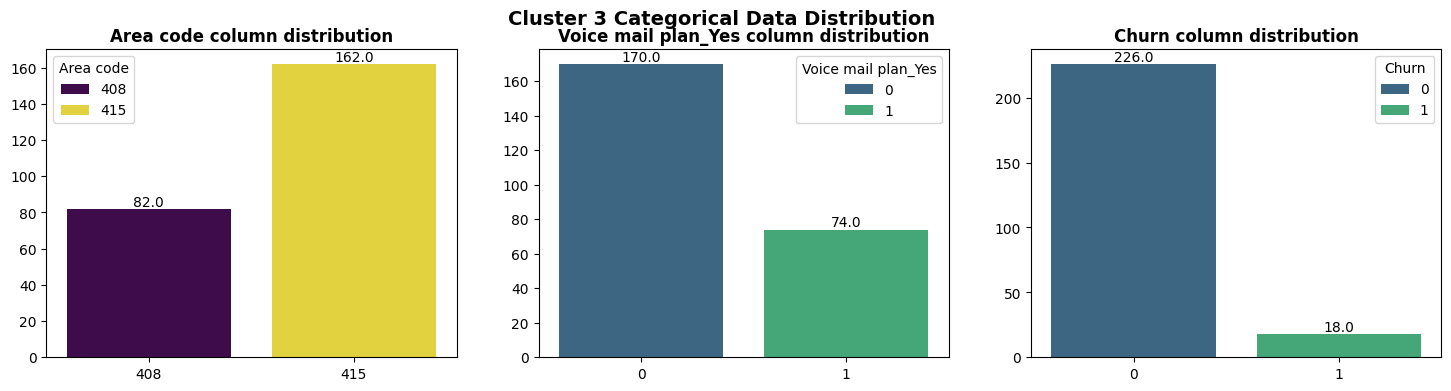

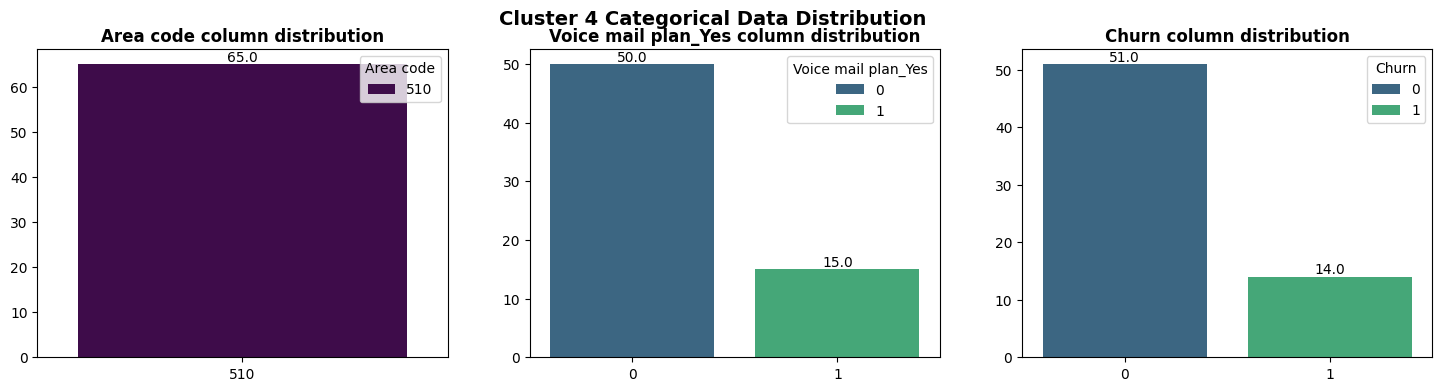

In [309]:
cols_cat = ['Area code', 'Voice mail plan_Yes', 'Churn']

for i in range(5):
  df_cluster_curr = df[df['cluster'] == i]
  plt.figure(figsize=(18, 4))
  for j, col in enumerate(cols_cat):
    plt.subplot(1, 3, j+1)
    count = df_cluster_curr[col].value_counts()
    ax = sns.barplot(x=count.index.tolist(), y=count.values.tolist(), hue=count.index, palette='viridis')
    for val in ax.containers:
      label=[v.get_height() for v in val]
      ax.bar_label(val, labels=label, label_type='edge')
    plt.title(f'{col} column distribution', fontsize=12, fontweight='bold')
  plt.suptitle(f'Cluster {i} Categorical Data Distribution', fontsize=14, fontweight='bold')
  plt.show()
  print(' ')

#**Conclusion**
---
The results of the classification model has proven satisfactory using the XGBoost (Extreme Gradient Boosting) algorithm without PCA, which yielded a recall score of 0.84. It should be noted that in this partciular case (customer churn), recall is more important and critical, as it is necessary that the model is able to correctly classify customers who churn, despite the high numbers of non-churning customers classified as churning customers.

It could also be ascertained, based on the results of the classification model, that the following features contributed the most to customer churn:
1. **Total day minutes**: duration of calls during the day, which may indicate how often a customer use the service.
2. **Total day charge**: amount charged for calls during the day, where higher charge may indicate that a customer relies on/often uses the service.
3. **Total eve minutes**: duration of calls during the evening, which may indicate the frequency that a customer uses the service.
4. **Total eve charge**: amount charged for calls during the evening, where higher charge may indicate that a customer relies on/often uses the service.
5. **Customer service calls**: may suggest that if a customer rarely does customer service calls, the customer is satisfied with the service.
6. **International plan_Yes**: suggests that if a customer has an international plan, then the customer is more loyal to the company's services.

On the other hand, the results of clustering are much less conclusive, having a relatively low silhouette score of ~0.52. However, there are still some insights which could be derived from the results of clustering:
1. **Cluster 0**: Consists of customers who (on average) spends **the 2nd most time on day calls** and on average **charged the 2nd highest price for day calls**. Despite this, this cluster has **the highest number of churning customer** ammounting to 24.84% of customes in this cluster, suggesting that ***customers of this cluster is more likely to churn***, likely due to higher costs for calls.
2. **Cluster 1**: This cluster has the **2nd lowest number of observations**, yet **has a relatively low churn rate (12.5%)**. Customers of this cluster on average **spends the 2nd lowest time on day calls**. This suggests that customers of this cluster ***are relatively loyal, and has a low risk of churning***.
3. **Cluster 2**: Consists of customers who (on average) spend the **least amount of time on day calls, thus having the least highest price charged**. At the same time, customers of cluster 2 has the **2nd lowest churn rate (10.89%)** and the **highest percentage of customers that paid for voice mail plan**. As such, ***customers of this cluster are valuable, as they are relatively loyal and willing to pay for more premium services***
4. **Cluster 3**: This cluster has the highest number of observations, though on average, customers of this cluster **spends the 3rd highest day call duration** and **3rd highest average price charged for day calls**. It should be noted however, that the price charged is still almost half that of clusters 4 and 0. A the same time, **this cluster has the lowest churn rate (~7.38%)**. This suggests that ***customers of this cluster are the most valuable, spending the highest amount of time on calls and more willing to be charged higher***.
5. **Cluster 4**: On average, customers of this cluster **has the highest day call duration** and **highest price charged for day calls**. At the same time, the percentage of churning customers of this cluster (~21.54%) is the 2nd highest among all clusters. This suggests that similar to cluster 0, ***customers of this cluster are also more at risk of churning***, likely due to higher costs of calls.